In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df=pd.read_csv(url, sep = '\t')

In [3]:
df.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [4]:
len(df.columns)

5

In [23]:
#самый заказываемый продукт
total_stats = pd.pivot_table(df, aggfunc = sum, index = 'item_name', values = 'quantity')
print(total_stats.loc[total_stats['quantity'].idxmax()])

quantity    761
Name: Chicken Bowl, dtype: int64


In [6]:
len(df.index)

4622

In [7]:
#сколько различного товра было продано
print("всвего было продано",len(total_stats.index),"различных товаров")

всвего было продано 50 различных товаров


In [27]:
#сколько всего заказали товаров
print("Всего заказали",df['quantity'].sum())

Всего заказали 4972


In [8]:
df['item_price']=df['item_price'].str.replace('$',' ')

In [28]:
#перевели во float
df.item_price = df.item_price.astype(float)
df['item_price'].dtypes

dtype('float64')

In [43]:
#цена каждого товара
print(df.groupby(['item_name'])['item_price'].mean())

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

In [29]:
#общая прибыль
summ=df['item_price'].sum()
summ

34500.16

In [30]:
#всего заказов
len(df['order_id'].drop_duplicates())

1834

In [31]:
total_sum = pd.pivot_table(df, aggfunc = sum, index = 'order_id', values = 'item_price')
print(total_sum)
total_sum['item_price'].mean()
#средняя сумма за заказ

          item_price
order_id            
1              11.56
2              16.98
3              12.67
4              21.00
5              13.70
6              17.50
7              15.70
8              10.88
9              10.67
10             13.20
11             12.38
12             14.37
13             10.88
14             10.08
15             10.88
16             10.68
17             10.08
18             24.90
19             13.90
20             36.20
21             23.36
22             12.98
23             11.17
24             12.07
25             11.38
26             20.50
27             13.90
28             33.70
29             17.98
30             23.36
...              ...
1805           20.00
1806           13.00
1807           18.64
1808           13.70
1809           14.45
1810           23.00
1811           29.25
1812           22.50
1813           17.50
1814           13.70
1815           12.50
1816           13.20
1817           13.00
1818           18.14
1819         

18.81142857142869

In [47]:
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": range(1800)})
dfa

,date,order_id
0,2017-01-31,0
1,2017-01-26,1
2,2017-01-25,2
3,2017-01-20,3
4,2017-01-07,4
5,2017-01-20,5
6,2017-01-01,6
7,2017-01-30,7
8,2017-01-24,8
9,2017-01-23,9


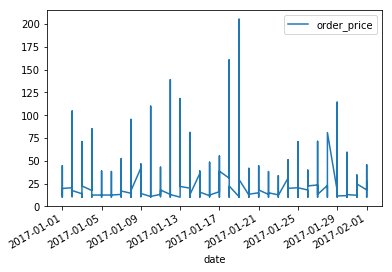

In [52]:
dfa['order_price']=total_sum['item_price']
dfa.plot(x='date',y='order_price')
plt.show()

In [33]:
#отсортировали по названию
df['item_name'].drop_duplicates().sort_values()

298                         6 Pack Soft Drink
39                              Barbacoa Bowl
21                           Barbacoa Burrito
168                     Barbacoa Crispy Tacos
1229                      Barbacoa Salad Bowl
56                        Barbacoa Soft Tacos
34                              Bottled Water
445                                      Bowl
510                                   Burrito
18                                Canned Soda
263                         Canned Soft Drink
33                              Carnitas Bowl
27                           Carnitas Burrito
554                     Carnitas Crispy Tacos
3750                           Carnitas Salad
1132                      Carnitas Salad Bowl
237                       Carnitas Soft Tacos
4                                Chicken Bowl
16                            Chicken Burrito
11                       Chicken Crispy Tacos
250                             Chicken Salad
44                         Chicken

In [34]:
df.sort_values(by='item_name').head(10)

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
3422,1373,1,6 Pack Soft Drink,[Coke],6.49
553,230,1,6 Pack Soft Drink,[Diet Coke],6.49
1916,774,1,6 Pack Soft Drink,[Diet Coke],6.49
1922,776,1,6 Pack Soft Drink,[Coke],6.49
1937,784,1,6 Pack Soft Drink,[Diet Coke],6.49


In [35]:
#смотрим сколько раз заказали Veggie Salad Bowl
total_stats.loc['Veggie Salad Bowl']

quantity    18
Name: Veggie Salad Bowl, dtype: int64

In [36]:
# в скольких заказах Canned Soda была заказана более 1 раза
total_order = pd.pivot_table(df, aggfunc = sum, index = 'order_id', columns = 'item_name', values = 'quantity')
(total_order['Canned Soda']>1).astype(bool).sum()

24

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000099DEA58>]],
      dtype=object)

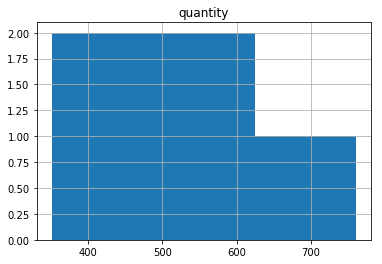

In [37]:

total_stats.sort_values(by='quantity').tail(5).hist(bins=3)
#5 самых покупаемых товаров,из них нужна гистограмма

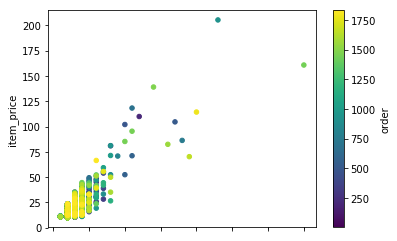

In [58]:
#Построить Scatterplot
total_q = pd.pivot_table(df, aggfunc = sum, index = 'order_id',values = ['quantity','item_price'])
total_q['order']=range(1,1835)
ax=total_q.plot.scatter(x='quantity',y='item_price', c='order', colormap='viridis')